In [52]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pytesseract
import numpy as np

In [53]:
img_path = r"test_img/shop_invoice.png"


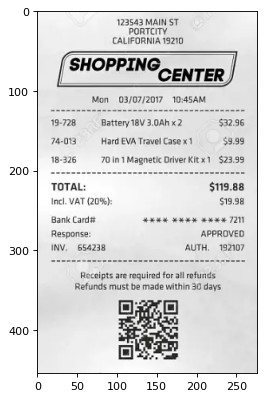

In [54]:
img = cv2.imread(img_path)
figure(figsize=(10, 6), dpi=80)
plt.imshow(img)

In [55]:
output_img = img.copy()
data = pytesseract.image_to_data(img,output_type = 'dict')
n_data = len(data['text'])
for i in range(n_data):
    if data['conf'][i] > 40 and len(data['text'][i])>3:
        print(data['text'][i])

123543
MAIN
PORTCITY
CALIFORNIA
19210
‘Mon
03/07/2017
10:45AM
19-728
$32.95
74-013
Hard
$8.98
18-326
DriverKitx1
$23.98
TOTAL:
$119.88
Incl.
(20%):
Bank
Cardst
Response
‘APPROVED
inv,
654238
AUTH,
192107
Receipts
required
fora
refunds
Refunds
must
made
within


### Line detection

In [56]:
img_height,img_width,channel = img.shape
print("Image shape : ",img.shape)

Image shape :  (455, 276, 3)


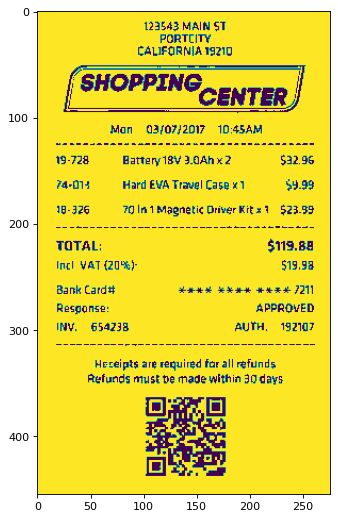

In [102]:
#
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#blur_img = cv2.medianBlur(gray_img,3)
threshold_img = cv2.threshold(gray_img,50,100,8)[1]
figure(figsize=(10,8),dpi=80)
plt.imshow(threshold_img)

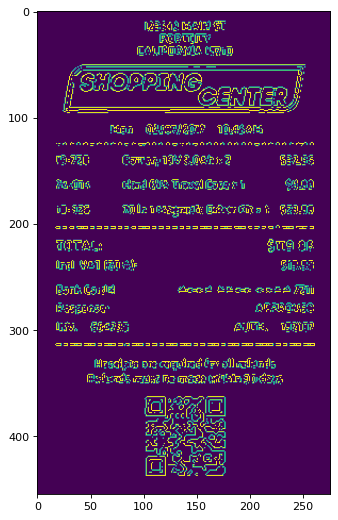

In [119]:
edges = cv2.Canny(threshold_img, 50, 200, None, 3)
figure(figsize=(10,8),dpi=80)
plt.imshow(edges)

In [180]:
import math


#lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)


rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 230  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
print("No of lines : ",len(img_output))

actual_lines = []
actual_points =[]
y_distance = 20



for line in lines:
    for x1,y1,x2,y2 in line:
        if len(actual_lines) == 0:
            actual_lines.append(y1)
            actual_points.append([x1,y1,x2,y2])
           
        else:
            is_needAdd =True
            for actual_y in actual_lines:
                if(np.abs(actual_y-y1) < y_distance):
                    is_needAdd = False
                    break
            
            if is_needAdd:
                actual_lines.append(y1)   
                actual_points.append([x1,y1,x2,y2])
                
        
print(actual_lines)

No of lines :  455
[315, 203, 125]


[[18, 315, 260, 315], [18, 203, 259, 203], [18, 125, 259, 125]]


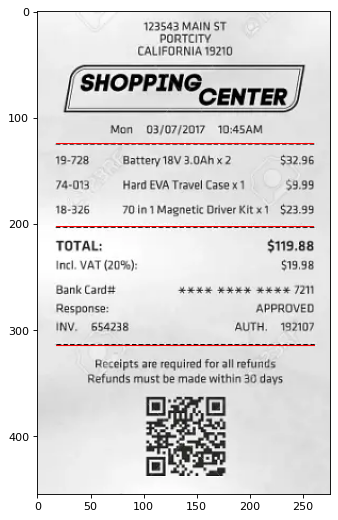

In [181]:
img_output = img.copy()
print(actual_points)
for x1,y1,x2,y2 in actual_points:
    cv2.line(img_output,(x1,y1),(x2,y2),(255,0,0),1)
figure(figsize=(10,8),dpi=80)
plt.imshow(img_output)

(125, 241, 3)


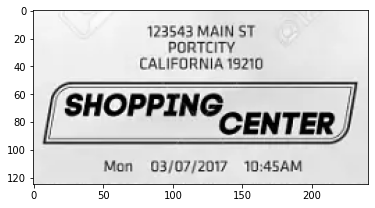

In [186]:
fist_part = actual_points[2]
first_img = img[:fist_part[3],fist_part[0]:fist_part[2],:]
print(first_img.shape)
plt.imshow(first_img)

[18, 203, 259, 203]
(78, 241, 3)


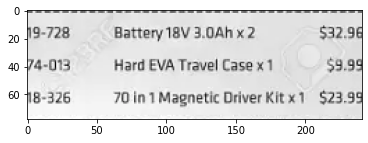

In [187]:
second_part = actual_points[1]
print(second_part)
second_img = img[fist_part[3]:second_part[3],second_part[0]:second_part[2],:]
print(second_img.shape)
plt.imshow(second_img)

203
315


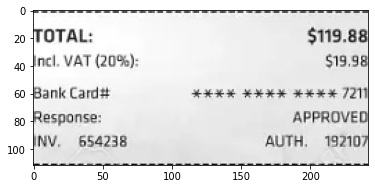

In [191]:
third_part = actual_points[0]

print(second_part[3])
print(third_part[3])


third_img = img[second_part[3]:third_part[3],third_part[0]:third_part[2],:]
plt.imshow(third_img)

[18, 315, 260, 315]
(140, 242, 3)


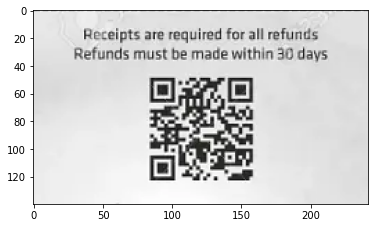

In [192]:
third_part = actual_points[0]
img_height,img_width,channel = img.shape
print(third_part)
final_img = img[third_part[3]:,third_part[0]:third_part[2],:]
print(final_img.shape)
plt.imshow(final_img)